# Import data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.offline as py



path = r'/Users/amritambe/Desktop/Analysis_Project/Women_Empowerment'
df = pd.read_csv(os.path.join(path, '2 Data', 'Clean_Data', '1_4_24_WEI.csv'), index_col='Unnamed: 0')
print('Data Imported:\n')
df.head()

Data Imported:



,Country_Id,Country_Name,Year,GDP_Growth,Index_1971,Index_2020,Fifty_Year_Change,Region,Income_Group,Question_Category,Question,Index_Score,2020_Data_Rank,2020_1GB_Price(USD),Avg_WEI_Score,k_clusters,GDP_Per_Cap,Life_Exp,Population
0,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law provide for the valuation of nonm...,0.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0
1,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do female and male surviving spouses have equa...,0.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0
2,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do men and women have equal ownership rights t...,20.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0
3,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Do sons and daughters have equal rights to inh...,0.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0
4,1,Afghanistan,1972,0.0,210.0,305.0,95.0,South Asia,Low income,Assets,Does the law grant spouses equal administrativ...,20.0,59.0,1.55,6.29,1,141.37,38.44,11286753.0


In [37]:
df.query('Country_Name == "Afghanistan"')['k_clusters'].nunique()

1

# define animation function

In [66]:
def plotly_3d_animated(df, x, y, z, animate, 
                           color=None, size=None, 
                           hover=None, hover_data=None, title=None):
        '''
            Create an animated 3D scatter plot using Plotly Express.
        
            Parameters:
            - df: DataFrame
            - x: X-axis variable (column in df)
            - y: Y-axis variable (column in df)
            - z: Z-axis variable (column in df)
            - color: Grouping variable (column in df)
            - size: Size variable (column in df)
            - hover: Column, Information variable (column in df) 
            - hover_data, List, Information variables, (columns in df)
            - animate: Animated variable (column in df)
            - title: Plot title
        
            Returns:
            - fig: Plotly Figure
        '''
        #plotly 3D scatter plot
        fig3 = px.scatter_3d(df, x, y, z,
                          color=color, 
                          size=size,
                          hover_name=hover, 
                          hover_data=hover_data, # list of columns for hover data
                          animation_frame=animate,
                          category_orders={color: ['0', '1', '2', '3']},
                          color_discrete_map={'0':'blue', '1':'orange', '2':'red', '3':'lightblue'}, #discrete vs continuous variables
                          title=title, 
                          size_max=100) # calibrate size of icons
    
        # Update scales so they're static, change size/titles
        fig3.update_layout(scene=dict(
                            xaxis=dict(range=[0, df[x].max()]),
                            yaxis=dict(range=[0, df[y].max()]),
                            zaxis=dict(range=[0, df[z].max()]),
                            xaxis_title=x,
                            yaxis_title=y,
                            zaxis_title=z),
                            width=1000, height=700,
                            showlegend=True)
    
        fig3.update_scenes(xaxis_autorange="reversed") #aesthetics of finished graph

        fig3.show()

        return fig3


# clean data, prep for animation

In [8]:
df_a = df.dropna().copy()
df_a.shape, df.shape

((277270, 19), (325850, 19))

In [38]:
df_a.query('Country_Name == "Afghanistan"')['k_clusters'].nunique()

1

In [68]:
df_a['k_clusters'] = df_a['k_clusters'].astype('str')
df_a['GDP_Per_Cap'] = df_a['GDP_Per_Cap'].astype('float32')
df_a['Life_Exp'] = df_a['Life_Exp'].astype('float32')
df_a['Population'] = df_a['Population'].astype('float32')

df_a.isnull().sum()

Country_Id             0
Country_Name           0
Year                   0
GDP_Growth             0
Index_1971             0
Index_2020             0
Fifty_Year_Change      0
Region                 0
Income_Group           0
Question_Category      0
Question               0
Index_Score            0
2020_Data_Rank         0
2020_1GB_Price(USD)    0
Avg_WEI_Score          0
k_clusters             0
GDP_Per_Cap            0
Life_Exp               0
Population             0
dtype: int64

In [69]:
df_animate = df_a.groupby(['Year', 'Country_Name', 'k_clusters', 'Region', 'Income_Group']) \
                 [['GDP_Per_Cap', 'Life_Exp', 'Population', 'Index_Score']] \
                 .agg(['mean']) \
                 .reset_index()
df_animate.columns = df_animate.columns.get_level_values(0)
df_animate.head()

,Year,Country_Name,k_clusters,Region,Income_Group,GDP_Per_Cap,Life_Exp,Population,Index_Score
0,1972,Afghanistan,1,South Asia,Low income,141.369995,38.439999,11286753.0,6.000000
1,1972,Algeria,1,Middle East & North Africa,Upper middle income,468.619995,44.349998,14439748.0,7.428571
2,1972,Australia,0,High income: OECD,High income,3949.370117,71.459999,13177000.0,12.428571
3,1972,Austria,0,High income: OECD,High income,2924.050049,70.459999,7544201.0,9.428571
4,1972,Bangladesh,1,South Asia,Lower middle income,90.680000,49.590000,69346704.0,8.000000


In [54]:
df_animate.isnull().sum()

Year            0
Country_Name    0
k_clusters      0
Region          0
Income_Group    0
GDP_Per_Cap     0
Life_Exp        0
Population      0
Index_Score     0
dtype: int64

# animate

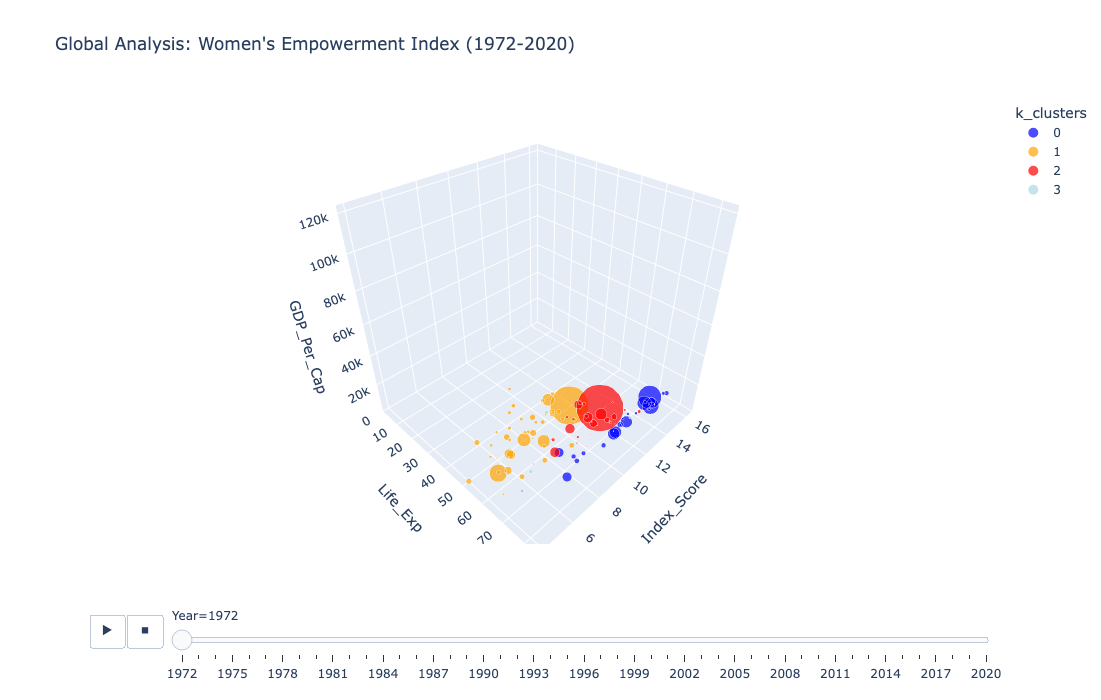

In [70]:
animation = plotly_3d_animated(df_animate, 'Index_Score', 'Life_Exp', 'GDP_Per_Cap', 
                   animate='Year', color='k_clusters', size='Population',
                   hover='Country_Name', hover_data=['Region', 'Income_Group'],
                   title="Global Analysis: Women's Empowerment Index (1972-2020)")

# Export visualization

In [71]:
py.plot(animation, filename='Women_Empowerment_animation.html')

'Women_Empowerment_animation.html'